# Tuning SARSA agent

1) During the first experiments and tests of our SARSA agent, it was not clear if glei strategy was more efficient than a basic epsilon greedy (strategy whre that we don't decay epsilon through training).  
Therefore, we will first study the differences between the glei and the normal strategies.  
**Results are interesting: they highlight the fact that glei strategy has no advantages (in terms of optimality and speed of convergence) for every epsilon above 0.2 and under 0.001.**  
**However, for epsilon of 0.005 & 0.01, glei strategy converges better and faster**

2) Then, the grid search highlights that the best set of parameter is:
    * Use GLEI strategy
    * starting epsilon: 0.005
    * alpha: 0.1
    * gamma: 1

## Libraries

In [1]:
import gymnasium as gym
import numpy as np
from agents.sarsa import SarsaAgent
from utils.tile_coding import mc_tile_encoding
from utils.utils_fct import plot_moving_averages, process_json

## 1. Studying the Impact of GLEI Strategy on $\epsilon$-Greedy Policy

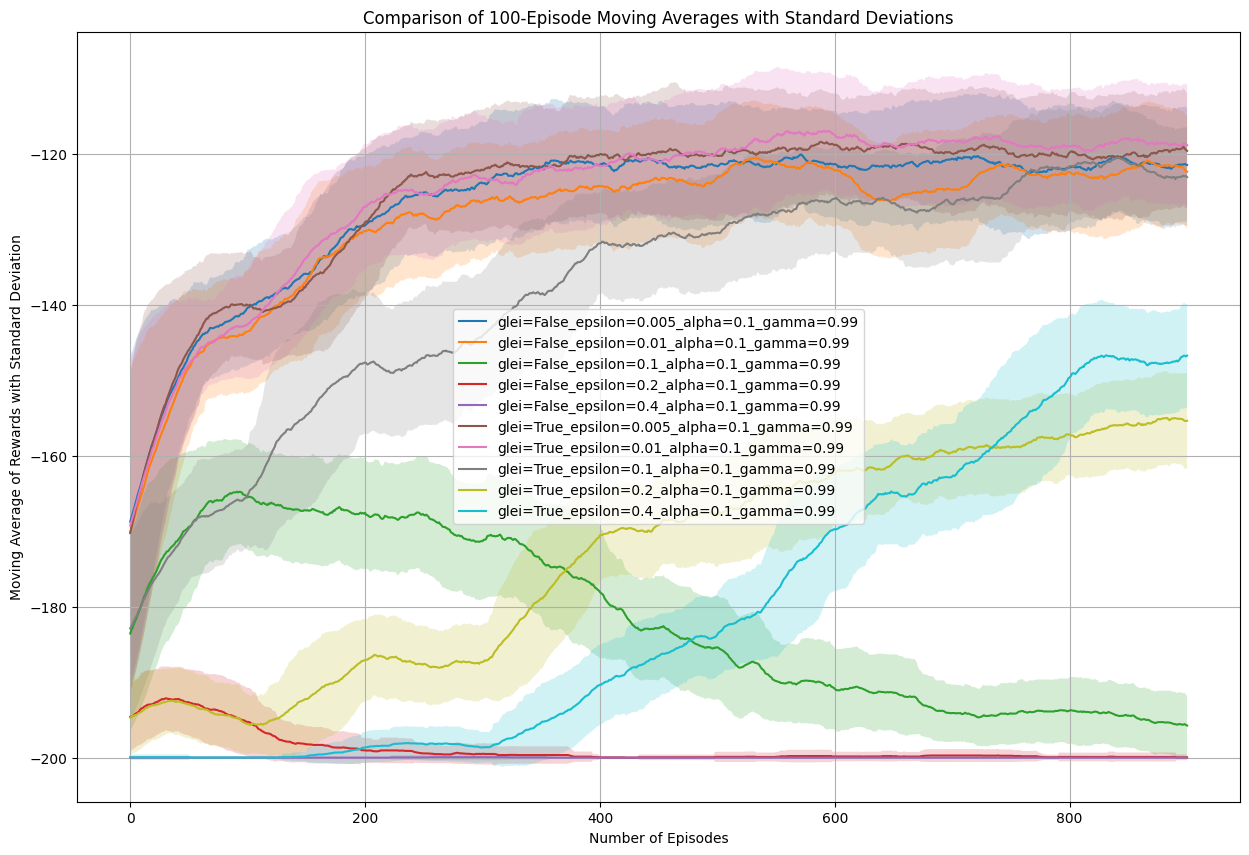

In [ ]:
glei_agent = SarsaAgent(env=gym.make("MountainCar-v0"), encode_fct=mc_tile_encoding)
glei_tune_historic = glei_agent.grid_search(
    alpha_values=[0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005, 0.01, 0.1, 0.2, 0.4],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=False,
)

no_glei_agent = SarsaAgent(env=gym.make("MountainCar-v0"), encode_fct=mc_tile_encoding)
no_glei_tune_historic = no_glei_agent.grid_search(
    alpha_values=[0.1],
    gamma_values=[0.99],
    epsilon_values=[0.005, 0.01, 0.1, 0.2, 0.4],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=False,
    verbose=False,
)

data_dict = {no_glei_tune_historic, glei_tune_historic}
process_json("./data/sarsa/glei_vs_noglei", "w", data_dict=data_dict)

plot_moving_averages(data_dict, nb_episodes=1000, window_size=100)

## 2. Searching best $\alpha$ and $\gamma$ for SARSA Agent

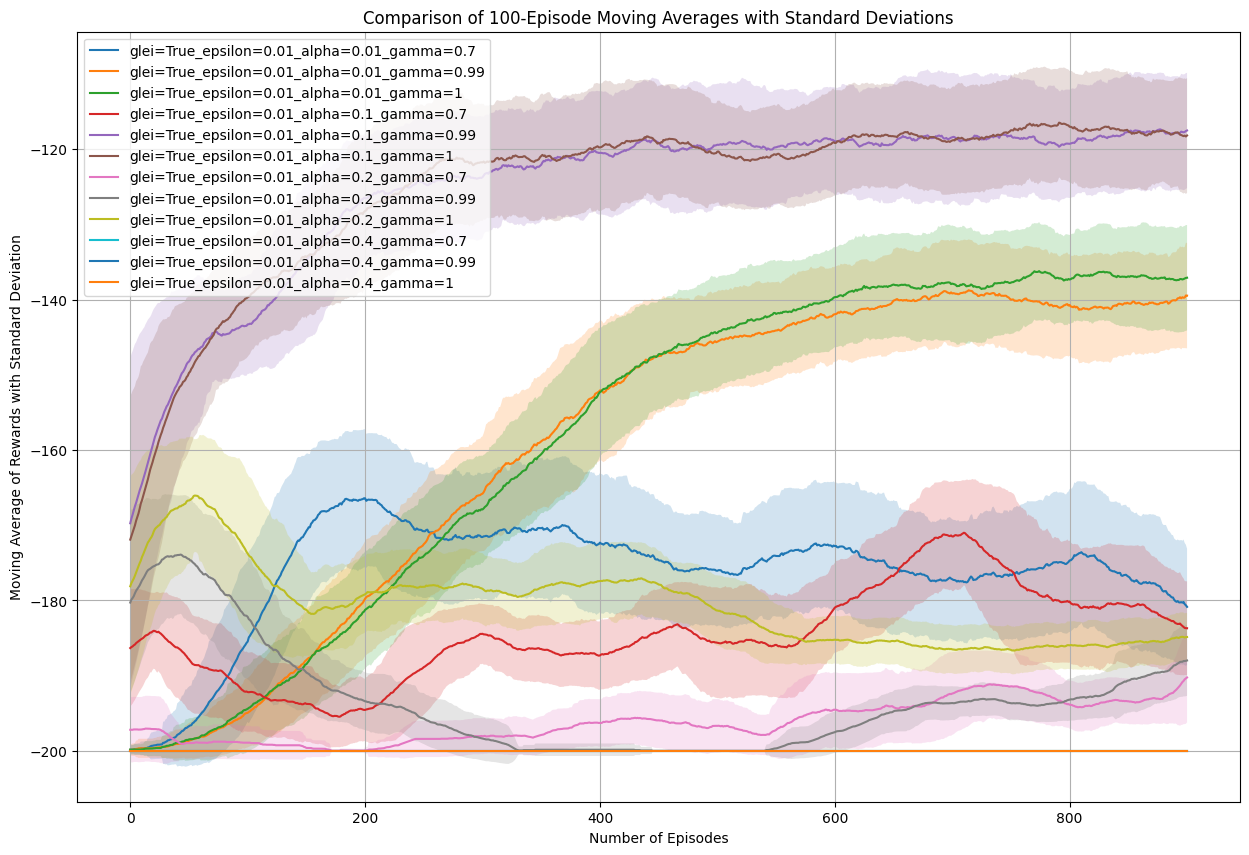

In [10]:
alpha_gamma_agent = SarsaAgent(
    env=gym.make("MountainCar-v0"), encode_fct=mc_tile_encoding
)
alpha_gamma_tune_historic = alpha_gamma_agent.grid_search(
    alpha_values=[0.01, 0.1, 0.2, 0.4],
    gamma_values=[0.7, 0.99, 1],
    epsilon_values=[0.01],
    nb_episodes=1000,
    nb_iter=10,
    use_glei=True,
    verbose=False,
)
process_json(
    "./data/sarsa/alpha_gamma_search_epsilon=0.01_glei=true",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

plot_moving_averages(alpha_gamma_tune_historic, nb_episodes=1000, window_size=100)

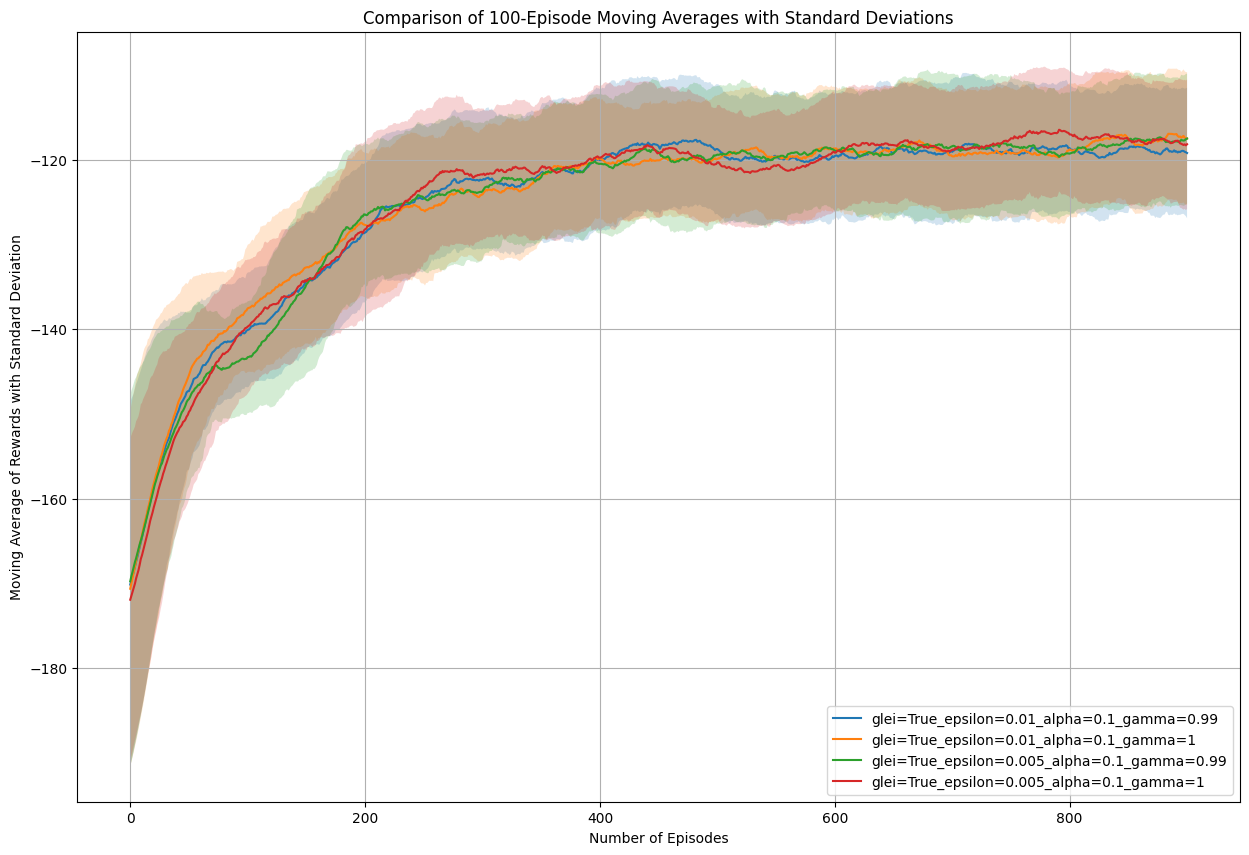

In [11]:
eps005_1 = process_json(
    "./data/sarsa/alpha_gamma_search_epsilon=0.005_glei=true",
    "r",
).get("glei=True_epsilon=0.005_alpha=0.1_gamma=0.99")

eps005_2 = process_json(
    "./data/sarsa/alpha_gamma_search_epsilon=0.005_glei=true",
    "r",
).get("glei=True_epsilon=0.005_alpha=0.1_gamma=1")

eps01_1 = process_json(
    "./data/sarsa/alpha_gamma_search_epsilon=0.01_glei=true",
    "r",
).get("glei=True_epsilon=0.01_alpha=0.1_gamma=0.99")

eps01_2 = process_json(
    "./data/sarsa/alpha_gamma_search_epsilon=0.01_glei=true",
    "r",
).get("glei=True_epsilon=0.01_alpha=0.1_gamma=1")

plot_moving_averages(
    rewards_dict={
        "glei=True_epsilon=0.01_alpha=0.1_gamma=0.99": eps005_1,
        "glei=True_epsilon=0.01_alpha=0.1_gamma=1": eps005_2,
        "glei=True_epsilon=0.005_alpha=0.1_gamma=0.99": eps01_1,
        "glei=True_epsilon=0.005_alpha=0.1_gamma=1": eps01_2,
    },
    nb_episodes=1000,
    window_size=100,
)